# Decision Tree for Competição ML @SBS/DAA - Edição 2023/2024

Goal: predict Injeção na rede (kWh)

In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [189]:
%store -r data
%store -r data_test

In [190]:
print(data.columns)
print(data.shape)
print(data.info())

Index(['Data', 'Normal (kWh)', 'Horário Económico (kWh)', 'Autoconsumo (kWh)',
       'Injeção na rede (kWh)', 'dt', 'city_name', 'temp', 'feels_like',
       'temp_min', 'temp_max', 'pressure', 'humidity', 'wind_speed', 'rain_1h',
       'clouds_all', 'weather_description', 'Mes', 'Hora', 'Estacao'],
      dtype='object')
(11016, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11016 entries, 0 to 11015
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Data                     11016 non-null  datetime64[ns]
 1   Normal (kWh)             11016 non-null  float64       
 2   Horário Económico (kWh)  11016 non-null  float64       
 3   Autoconsumo (kWh)        11016 non-null  float64       
 4   Injeção na rede (kWh)    11016 non-null  int64         
 5   dt                       11016 non-null  int64         
 6   city_name                11016 non-null  object        
 7   

In [191]:
print(data_test.columns)
print(data_test.shape)
print(data_test.info())

Index(['Data', 'Normal (kWh)', 'Horário Económico (kWh)', 'Autoconsumo (kWh)',
       'Injeção na rede (kWh)', 'dt', 'city_name', 'temp', 'feels_like',
       'temp_min', 'temp_max', 'pressure', 'humidity', 'wind_speed', 'rain_1h',
       'clouds_all', 'weather_description', 'Mes', 'Hora', 'Estacao'],
      dtype='object')
(2256, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Data                     2256 non-null   datetime64[ns]
 1   Normal (kWh)             2256 non-null   float64       
 2   Horário Económico (kWh)  2256 non-null   float64       
 3   Autoconsumo (kWh)        2256 non-null   float64       
 4   Injeção na rede (kWh)    0 non-null      float64       
 5   dt                       1752 non-null   float64       
 6   city_name                1752 non-null   object        
 7   tem

Drop columns with low correlation in relation to the label

In [192]:
data_dt   = data.copy()
data_dt_test = data_test.copy()
rem = ['dt','pressure','wind_speed','Mes','Hora','city_name','Data','rain_1h','clouds_all'] 
data_dt.drop(rem,axis=1,inplace=True)
data_dt_test.drop(rem ,axis=1,inplace=True)
nulls = True
if nulls:
    data_dt_test['temp']                = data_dt_test['temp'].fillna(0)
    data_dt_test['feels_like']          = data_dt_test['feels_like'].fillna(0)
    data_dt_test['temp_min']            = data_dt_test['temp_min'].fillna(0)
    data_dt_test['temp_max']            = data_dt_test['temp_max'].fillna(0)
    data_dt_test['humidity']            = data_dt_test['humidity'].fillna(0)
    # data_dt_test['clouds_all']          = data_dt_test['clouds_all'].fillna(0)
    data_dt_test['weather_description'] = data_dt_test['weather_description'].fillna(0)

data_dt.info()
data_dt_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11016 entries, 0 to 11015
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Normal (kWh)             11016 non-null  float64
 1   Horário Económico (kWh)  11016 non-null  float64
 2   Autoconsumo (kWh)        11016 non-null  float64
 3   Injeção na rede (kWh)    11016 non-null  int64  
 4   temp                     11016 non-null  float64
 5   feels_like               11016 non-null  float64
 6   temp_min                 11016 non-null  float64
 7   temp_max                 11016 non-null  float64
 8   humidity                 11016 non-null  int64  
 9   weather_description      11016 non-null  int64  
 10  Estacao                  11016 non-null  int64  
dtypes: float64(7), int64(4)
memory usage: 946.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 11 columns):
 #   Column                   

In [193]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

def grafico_barras(data,atr,title,xlabel,ylabel):
    incidents_count = data[atr].value_counts()
    sns.set(style='darkgrid')
    sns.barplot(x=incidents_count.index, y=incidents_count.values)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.show()


X = data_dt.drop(['Injeção na rede (kWh)'],axis=1)
y = data_dt['Injeção na rede (kWh)'].to_frame()
random = 2021
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=random)

In [194]:
print("The shape of X %s. X_train has shape %s while X_test has shape %s" %(X.shape, X_train.shape, X_test.shape))
print("The shape of y %s. y_train has shape %s while y_test has shape %s" %(y.shape, y_train.shape, y_test.shape))

The shape of X (11016, 10). X_train has shape (8262, 10) while X_test has shape (2754, 10)
The shape of y (11016, 1). y_train has shape (8262, 1) while y_test has shape (2754, 1)


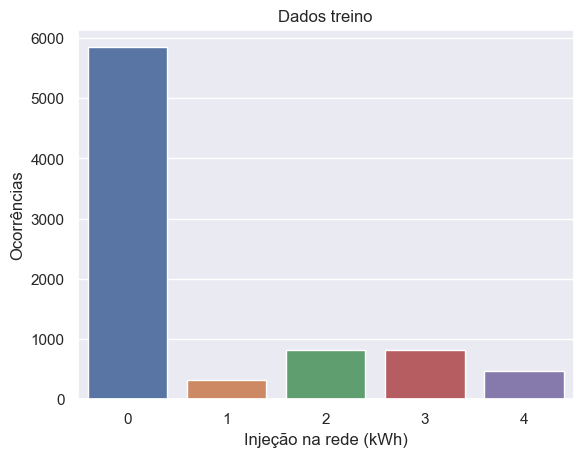

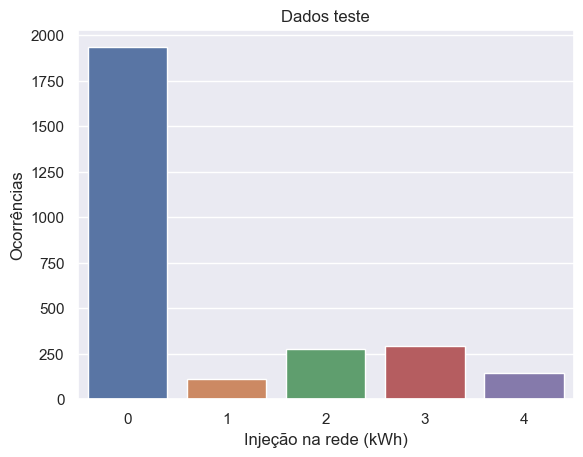

In [195]:
grafico_barras(y_train,'Injeção na rede (kWh)','Dados treino','Injeção na rede (kWh)','Ocorrências')
grafico_barras(y_test,'Injeção na rede (kWh)','Dados teste','Injeção na rede (kWh)','Ocorrências')

In [196]:
model = DecisionTreeClassifier(random_state=random)
model.fit(X_train,y_train)
predictions = model.predict(X_test)

In [197]:
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))

[[1871   32   26    3    1]
 [  32   37   36    4    1]
 [  23   34  137   65   17]
 [   3    5   75  153   56]
 [   1    0   15   62   65]]
0.8217138707334786


In [206]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay, accuracy_score
def stats_confusion_matrix(model,x_test,y_test):
    predictions = model.predict(x_test)
    print("%0.2f accuracy" % (accuracy_score(y_test,predictions)))
    print(classification_report(y_test,predictions))
    ConfusionMatrixDisplay.from_predictions(y_test, predictions)
    plt.show()

0.82 accuracy
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1933
           1       0.34      0.34      0.34       110
           2       0.47      0.50      0.48       276
           3       0.53      0.52      0.53       292
           4       0.46      0.45      0.46       143

    accuracy                           0.82      2754
   macro avg       0.56      0.56      0.56      2754
weighted avg       0.82      0.82      0.82      2754



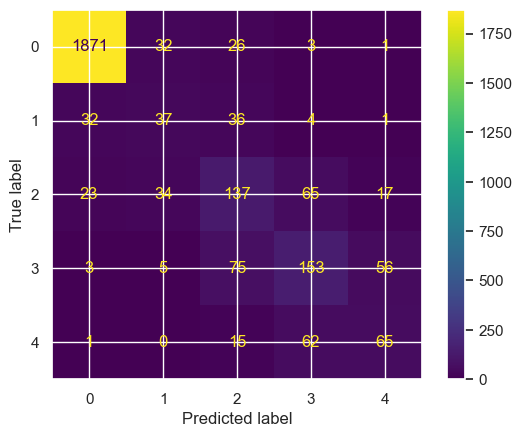

In [207]:
stats_confusion_matrix(model,X_test,y_test)

In [208]:
X_train_submission = data_dt.drop(['Injeção na rede (kWh)'],axis=1)
y_train_submission = data_dt['Injeção na rede (kWh)'].to_frame()
X_test_submission = data_dt_test.drop(['Injeção na rede (kWh)'],axis=1)

print(X_train_submission.info())
print(X_test_submission.info())

model_submission = DecisionTreeClassifier(random_state=random)
model_submission.fit(X_train_submission,y_train_submission)
predictions = model_submission.predict(X_test_submission)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11016 entries, 0 to 11015
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Normal (kWh)             11016 non-null  float64
 1   Horário Económico (kWh)  11016 non-null  float64
 2   Autoconsumo (kWh)        11016 non-null  float64
 3   temp                     11016 non-null  float64
 4   feels_like               11016 non-null  float64
 5   temp_min                 11016 non-null  float64
 6   temp_max                 11016 non-null  float64
 7   humidity                 11016 non-null  int64  
 8   weather_description      11016 non-null  int64  
 9   Estacao                  11016 non-null  int64  
dtypes: float64(7), int64(3)
memory usage: 860.8 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------              

In [209]:
def gera_csv(predictions,name):
    row_ids = range(1, len(predictions) + 1)
    submission_df = pd.DataFrame({'RowId': row_ids, 'Result': predictions})
    replace_map = {'Result': {0:'None',1: 'Low', 2: 'Medium' ,3: 'High',4 : 'Very High' }}
    submission_df.replace(replace_map,inplace=True)
    submission_df.to_csv(name, index=False)
gera_csv(predictions,'grupo20_dt.csv')

In [210]:
from sklearn.ensemble import RandomForestClassifier
model_rft = RandomForestClassifier(max_depth=10,random_state=random, min_samples_split=5, min_samples_leaf=2)
model_rft.fit(X_train,y_train.values.ravel())
predictions_rft = model_rft.predict(X_test)

In [211]:
print(confusion_matrix(y_test,predictions_rft))
print(accuracy_score(y_test,predictions_rft))

[[1895    9   28    1    0]
 [  41   13   54    1    1]
 [  16    3  178   67   12]
 [   0    1   63  190   38]
 [   0    0    4   67   72]]
0.8525780682643428


0.85 accuracy
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1933
           1       0.50      0.12      0.19       110
           2       0.54      0.64      0.59       276
           3       0.58      0.65      0.61       292
           4       0.59      0.50      0.54       143

    accuracy                           0.85      2754
   macro avg       0.64      0.58      0.58      2754
weighted avg       0.85      0.85      0.84      2754



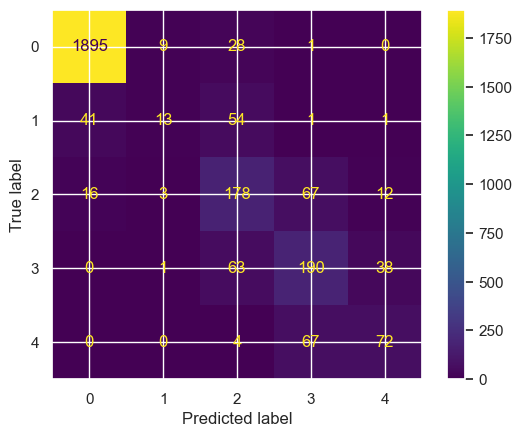

In [212]:
stats_confusion_matrix(model_rft,X_test,y_test)

In [214]:
model_submission_rft = RandomForestClassifier(max_depth=10,random_state=random)
model_submission_rft.fit(X_train_submission,y_train_submission.values.ravel())
predictions_rft = model_submission_rft.predict(X_test_submission)
gera_csv(predictions_rft,'grupo20_rft.csv')